<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/ReccomendationEnginesRestart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Based Reccomendations

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357288 sha256=c1767bb55e862fa0155583b296a6eb6225f276acdf210982b740bf6679c07112
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from surprise import Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import accuracy
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from urllib.request import urlretrieve
import zipfile

In [19]:
#Make sure that ml-latest-small.zip is downloaded and place the csv file 'ratings.csv' and 'movies.csv' into the files section of colab
#urlretrieve('https://files.grouplens.org/datasets/movielens/ml-latest-small.zip', 'movielens.zip')
zip_ref = zipfile.ZipFile('movielens.zip', 'r')
zip_ref.extractall()
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

df = pd.merge(ratings_df, movies_df[['movieId', 'genres']], on='movieId', how ='left' )

df.head()

,userId,movieId,rating,timestamp,genres
0,1,1,4.0,964982703,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Comedy|Romance
2,1,6,4.0,964982224,Action|Crime|Thriller
3,1,47,5.0,964983815,Mystery|Thriller
4,1,50,5.0,964982931,Crime|Mystery|Thriller


In [20]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
mlb = MultiLabelBinarizer()

df['userId'] = user_encoder.fit_transform(df['userId'])
df['movieId'] = movie_encoder.fit_transform(df['movieId'])

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('genres').str.split('|')), columns = mlb.classes_, index = df.index ))

df.head()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,4.0,964982703,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2,4.0,964981247,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,5,4.0,964982224,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,43,5.0,964983815,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,46,5.0,964982931,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
86083,558,466,3.0,845476533,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
73879,473,2056,3.0,1081178176,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97307,604,6048,3.0,1277175847,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20900,138,2832,3.0,1453924104,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
73877,473,2048,4.0,1137520886,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,17,690,4.0,1455748398,0,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
44254,293,1783,1.0,966597308,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77757,482,6045,3.5,1185098312,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
68993,447,1644,4.0,1019132349,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.drop(columns = "(no genres listed)", inplace = True)

In [23]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

In [24]:
model_svd = SVD()
model_svd.fit(trainset)

predictions_svd = model_svd.test(trainset.build_anti_testset())
accuracy.rmse(predictions_svd)

RMSE: 0.4772


0.4771626567772467

In [ ]:
def get_top_n_reccomendations(user_id, n=5):
  user_movies = df[df['userId'] == user_id]['movieId'].unique()
  all_movies = df['movieId'].unique()
  movies_to_predict = list(set(all_movies) - set(user_movies))
  user_movie_pairs = [(user_id, movie_id, 0) for movie_id in movies_to_predict]
  predictions_cf = model_svd.test(user_movie_pairs)

  top_n_reccomendations = sorted(predictions_cf, key=lambda x: x.est, reverse=True)[:n]
  for pred in top_n_reccomendations:
    predicted_rating = pred.est
    print(predicted_rating)
  top_n_movie_ids = [int(pred.iid) for pred in top_n_reccomendations]
  top_n_movies = movie_encoder.inverse_transform(top_n_movie_ids)

  return top_n_movies

In [ ]:
user_id = 1
reccomendations = get_top_n_reccomendations(user_id)
top_n_movies_titles = movies_df[movies_df['movieId'].isin(reccomendations)]['title'].tolist()
print(f"Top 5 reccomendations for user {user_id}:")
for i, title in enumerate(top_n_movies_titles, 1):
    print(f"{i}. {title}")

4.554863937557374
4.517695827647719
4.398807576818868
4.376089247798162
4.368689111581489
Top 5 reccomendations for user 1:
1. Pulp Fiction (1994)
2. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
3. Some Like It Hot (1959)
4. Rosemary's Baby (1968)
5. Outlaw Josey Wales, The (1976)


# User Based Reccomendations

In [36]:
#Data processing
import pandas as pd
import numpy as np
import scipy.stats

#Visualization
import seaborn as sns

#Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
#read in data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [32]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [41]:
# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users.')

#Number of Movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies.')

#Number of Ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings.')

#List of unique ratings
print('The uniqe ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 610 unique users.
The ratings dataset has 9724 unique movies.
The ratings dataset has 10 unique ratings.
The uniqe ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [42]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [50]:
df = pd.merge(ratings, movies, on='movieId', how='inner')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [51]:
#aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()
agg_ratings.head()
#keep only the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings'] > 100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [52]:
#Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()


,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278


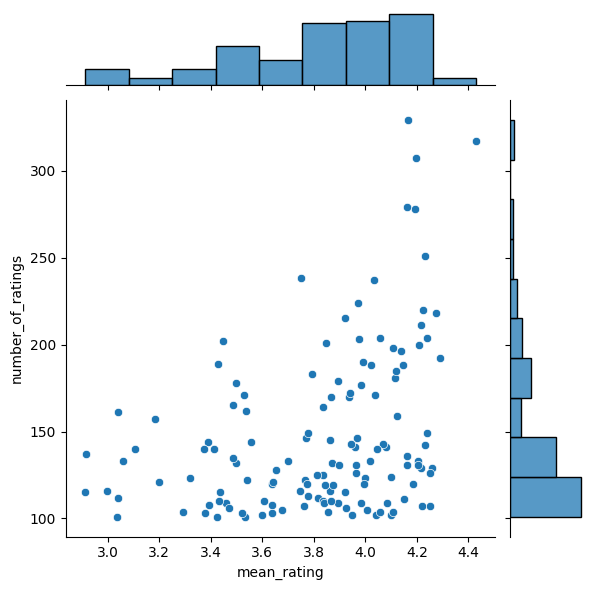

In [53]:
#Visualization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [54]:
#Merge the data
df_GT100 = pd.merge(df, agg_ratings_GT100[['title']], on = 'title', how = 'inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     19788 non-null  int64  
 1   movieId    19788 non-null  int64  
 2   rating     19788 non-null  float64
 3   timestamp  19788 non-null  int64  
 4   title      19788 non-null  object 
 5   genres     19788 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 927.7+ KB


In [55]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users.')

#Number of Movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies.')

#Number of Ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings.')

#List of unique ratings
print('The uniqe ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 597 unique users.
The ratings dataset has 134 unique movies.
The ratings dataset has 10 unique ratings.
The uniqe ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [56]:
#Create user-item matric
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [57]:
#Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


In [58]:
#Identify similar users
# User similarity matrix using Pearson Correlation Coefficient
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.0,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


In [59]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.        ,  0.        , ...,  0.14893867,
        -0.06003146,  0.04528224],
       [ 0.        ,  1.        ,  0.        , ..., -0.04485403,
        -0.25197632,  0.18886414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14893867, -0.04485403,  0.        , ...,  1.        ,
         0.14734568,  0.07931015],
       [-0.06003146, -0.25197632,  0.        , ...,  0.14734568,
         1.        , -0.14276787],
       [ 0.04528224,  0.18886414,  0.        , ...,  0.07931015,
        -0.14276787,  1.        ]])

In [60]:
#Use userID 1 as an example
#Pick User id 1
picked_userid = 1

#Remove picked user ID from the canidate list
user_similarity.drop(index=picked_userid, inplace=True)

#Take a look at the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582
6,-0.439941,NaN,NaN,0.421927,-0.006888,1.000000,0.000000,-0.127385,NaN,0.957427,...,-0.292770,-0.030599,-0.123983,-0.176327,0.063861,-0.468008,0.541386,-0.337129,0.158255,-0.030567


In [61]:
from re import S
#Number of similar users
n = 10

#User similarity threashold
user_similarity_threshold = 0.3

#Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)

#print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users[0:n])

The similar users for user 1 are userId
108    1.000000
9      1.000000
550    1.000000
598    1.000000
502    1.000000
401    0.942809
511    0.925820
366    0.872872
154    0.866025
595    0.866025
Name: 1, dtype: float64


In [62]:
#Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched


title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


In [63]:
#Movies that similar users watched. Removed movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies
#

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.257143,NaN,-0.742857,NaN,NaN,1.257143,NaN,-0.742857,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.111111,NaN,NaN,-0.111111,NaN,NaN,NaN,-1.111111,NaN,NaN
15,NaN,NaN,-0.815217,1.184783,1.184783,NaN,0.184783,0.684783,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.315217,NaN,-0.315217,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,1.465116,-1.034884,-0.534884,1.465116,1.465116,1.465116,1.465116,0.465116,-1.034884,1.465116,...,-0.534884,0.465116,-0.534884,-1.034884,-0.534884,-0.034884,0.465116,-1.034884,-0.534884,-0.034884
600,0.710000,-0.290000,0.210000,-0.790000,-1.290000,0.710000,1.210000,0.710000,-1.790000,NaN,...,-0.290000,0.210000,1.210000,-0.790000,NaN,NaN,NaN,-1.290000,1.710000,-0.290000


In [64]:
#Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
similar_user_movies


title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Pie (1999),Apollo 13 (1995),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Batman Begins (2005),...,Terminator 2: Judgment Day (1991),There's Something About Mary (1998),Titanic (1997),Trainspotting (1996),True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Up (2009),WALL·E (2008),Waterworld (1995)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,0.617647,NaN,NaN,NaN,NaN,0.617647,NaN,NaN,...,NaN,-0.382353,NaN,NaN,NaN,NaN,-1.382353,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.257143,NaN,1.257143,NaN,...,NaN,NaN,NaN,NaN,1.257143,NaN,-0.742857,NaN,NaN,-0.742857
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,0.888889,NaN,NaN,NaN,...,-0.111111,-0.111111,0.888889,NaN,-0.111111,NaN,NaN,NaN,NaN,-1.111111
15,NaN,NaN,-0.815217,1.184783,NaN,NaN,NaN,NaN,NaN,NaN,...,1.184783,NaN,NaN,NaN,NaN,NaN,NaN,-0.315217,-0.315217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,1.465116,-1.034884,-0.534884,1.465116,1.465116,-1.034884,-1.034884,-0.034884,NaN,-0.534884,...,0.965116,-0.534884,-0.534884,-0.034884,-0.534884,0.465116,-0.534884,-0.534884,0.465116,-1.034884
600,0.710000,-0.290000,0.210000,-1.290000,0.710000,-1.790000,-1.290000,-0.790000,-1.290000,-0.790000,...,-0.290000,-0.290000,-0.290000,0.210000,-0.290000,0.210000,1.210000,NaN,NaN,-1.290000


In [65]:
#Decide which movies to reccomend to the user
#A dictionary to store item scores
item_score = {}

#loop through items
for i in similar_user_movies.columns:
  #Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  #Create a variable to store the score
  total = 0
  #Create a variable to store the number of scores
  count = 0
  #Loop through similar users
  for u in similar_users.index:
    #If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      #Score is the sum of user similarity score multiply
      score = similar_users[u] * movie_rating[u]
      #Add the score to the total score for the movie so far
      total += score
      #Add 1 to the count
      count +=1
  #Get the average score for the item
  item_score[i] = total / count

#Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

#Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

#Select top m movies
m = 10
ranked_item_score.head(m)


,movie,movie_score
60,"Shawshank Redemption, The (1994)",0.264472
0,2001: A Space Odyssey (1968),0.213674
33,"Godfather, The (1972)",0.210781
34,"Godfather: Part II, The (1974)",0.206426
26,Eternal Sunshine of the Spotless Mind (2004),0.201136
48,"Lord of the Rings: The Return of the King, The...",0.184004
13,Blade Runner (1982),0.181134
40,Inception (2010),0.176176
22,"Departed, The (2006)",0.164265
4,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",0.150960


In [67]:
#Predict the scores
#Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

#Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')



Teh average movie rating for user 1 is 4.39


In [68]:
#Calculate the predicted rating
#The average movie rating for user 1 is 4.39 so we will add back 4.39 to the movie score
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

#take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
60,"Shawshank Redemption, The (1994)",0.264472,4.657329
0,2001: A Space Odyssey (1968),0.213674,4.606531
33,"Godfather, The (1972)",0.210781,4.603638
34,"Godfather: Part II, The (1974)",0.206426,4.599283
26,Eternal Sunshine of the Spotless Mind (2004),0.201136,4.593993
48,"Lord of the Rings: The Return of the King, The...",0.184004,4.576861
13,Blade Runner (1982),0.181134,4.573991
40,Inception (2010),0.176176,4.569033
22,"Departed, The (2006)",0.164265,4.557122
4,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",0.150960,4.543817
